In [49]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [50]:
def build_model(my_learning_rate):

  #declare model
  model = tf.keras.models.Sequential()

  #declare model's topography i.e. no of layers and nodes
  model.add(tf.keras.layers.Dense(units = 1, input_shape = (1, )))

  #compile the model
  model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = my_learning_rate), loss = "mean_squared_error", metrics = [tf.keras.metrics.RootMeanSquaredError()])

  return model

In [51]:
def train_model(model, feature, label, epochs, batch_size):
  #feed data to model
  history = model.fit(x = feature, y = label, batch_size = batch_size, epochs = epochs)

  #get trained model's weights and bias
  trained_weights = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  #get history of each epoch
  hist = pd.DataFrame(history.history)

  #get model's RMSE for each epoch
  rmse = hist["root_mean_squared_error"]

  return trained_weights, trained_bias, epochs, rmse

print(f'Defined Trained Model and Build Model')


Defined Trained Model and Build Model


In [52]:
def plot_the_model(trained_weight, trained_bias, feature, label):
  plt.xlabel('feature')
  plt.ylabel('label')

  plt.scatter(feature, label)

  #plot the model line
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c = "r")

  plt.show()

def plot_the_loss_curve(epochs, rmse):
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel('Root Mean Squared Error')

  plt.plot(epochs, rmse, label = "loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

  

Epoch 1/125


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


12/12 [==============================] - 0s 2ms/step - loss: 173.9519 - root_mean_squared_error: 13.1891
Epoch 2/125
12/12 [==============================] - 0s 2ms/step - loss: 81.6997 - root_mean_squared_error: 9.0388
Epoch 3/125
12/12 [==============================] - 0s 2ms/step - loss: 33.9220 - root_mean_squared_error: 5.8243
Epoch 4/125
12/12 [==============================] - 0s 2ms/step - loss: 10.4634 - root_mean_squared_error: 3.2347
Epoch 5/125
12/12 [==============================] - 0s 2ms/step - loss: 2.5680 - root_mean_squared_error: 1.6025
Epoch 6/125
12/12 [==============================] - 0s 2ms/step - loss: 1.1012 - root_mean_squared_error: 1.0494
Epoch 7/125
12/12 [==============================] - 0s 2ms/step - loss: 1.0599 - root_mean_squared_error: 1.0295
Epoch 8/125
12/12 [==============================] - 0s 2ms/step - loss: 1.0623 - root_mean_squared_error: 1.0307
Epoch 9/125
12/12 [==============================] - 0s 2ms/step - loss: 1.2144 - root_mean_sq

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


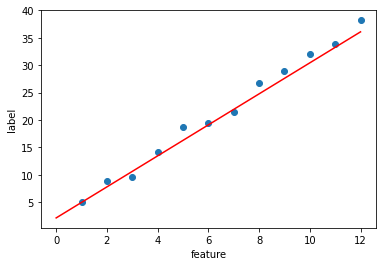

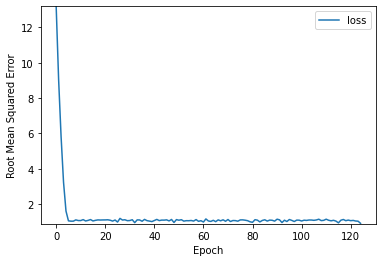

In [53]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

learning_rate=0.05
epochs=125
my_batch_size=1 # Wow, a batch size of 1 works!

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, my_label, epochs, my_batch_size)

plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)